In [285]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
data = pd.read_csv(r"C:\Users\Bhavika\Downloads\DsResearch\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv", encoding='ISO-8859-1')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# EDA

In [290]:
data.shape

(1006, 29)

In [292]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [294]:
missing_val = data.isnull().sum()
missing_val[missing_val >0 ]

subscribers                                  3
category                                    55
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
subscribers_for_last_30_days               340
created_year                                 5
created_month                               12
created_date                                 5
Gross tertiary education enrollment (%)    126
Population                                 126
Unemployment rate                          126
Urban_population                           126
Latitude                                   126
Longitude                                  126
dtype: int64

In [296]:
#data = data.fillna(0)

In [298]:
data.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                float64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country of origin                           object
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days   

## Filling the missing values of numerical columns by mean

In [301]:
data['subscribers']=data['subscribers'].fillna(data['subscribers'].mean())
data['video_views_rank']=data['video_views_rank'].fillna(data['video_views_rank'].mean())
data['country_rank']=data['country_rank'].fillna(data['country_rank'].mean())
data['channel_type_rank']=data['channel_type_rank'].fillna(data['channel_type_rank'].mean())
data['video_views_for_the_last_30_days']=data['video_views_for_the_last_30_days'].fillna(data['video_views_for_the_last_30_days'].mean())
data['subscribers_for_last_30_days']=data['subscribers_for_last_30_days'].fillna(data['subscribers_for_last_30_days'].mean())
data['created_year']=data['created_year'].fillna(data['created_year'].mean())
data['created_date']=data['created_date'].fillna(data['created_date'].mean())
data['Gross tertiary education enrollment (%)']=data['Gross tertiary education enrollment (%)'].fillna(data['Gross tertiary education enrollment (%)'].mean())
data['Population']=data['Population'].fillna(data['Population'].mean())
data['Unemployment rate']=data['Unemployment rate'].fillna(data['Unemployment rate'].mean())
data['Urban_population']=data['Urban_population'].fillna(data['Urban_population'].mean())
data['Latitude']=data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude']=data['Longitude'].fillna(data['Longitude'].mean())

## Filling the missing values of categorical columns by mode

In [304]:
data['category']=data['category'].fillna(data['category'].mode()[0])
data['Country of origin']=data['Country of origin'].fillna(data['Country of origin'].mode()[0])
data['Country']=data['Country'].fillna(data['Country'].mode()[0])
data['Abbreviation']=data['Abbreviation'].fillna(data['Abbreviation'].mode()[0])
data['channel_type']=data['channel_type'].fillna(data['channel_type'].mode()[0])
data['created_month']=data['created_month'].fillna(data['created_month'].mode()[0])

In [306]:
data.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,3.495419e+05,2006.0,Jan,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [308]:
missing_val = data.isnull().sum()
missing_val[missing_val >0 ]

Series([], dtype: int64)

In [310]:
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,1006.000000,1.006000e+03,1.006000e+03,1006.000000,1.006000e+03,1006.000000,1006.000000,1.006000e+03,1006.000000,1.006000e+03,...,1.006000e+03,1.006000e+03,1006.000000,1006.000000,1006.000000,1.006000e+03,1006.000000,1.006000e+03,1006.000000,1006.000000
mean,497.472167,2.319501e+07,1.112411e+10,9168.335984,5.607670e+05,384.289741,742.311020,1.760978e+08,37034.348489,5.922453e+05,...,7.110327e+06,3.495419e+05,2012.613387,15.712288,63.597273,4.304586e+08,9.258966,2.239747e+08,26.639994,-13.811287
std,288.738758,1.780383e+07,1.424148e+10,34028.189437,1.368205e+06,1152.406538,1904.078945,4.033444e+08,71869.653679,1.148967e+06,...,1.379921e+07,4.987677e+05,4.502888,8.743278,24.404935,4.428744e+08,4.573118,1.449939e+08,19.186892,79.239644
min,1.000000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,247.250000,1.450000e+07,4.281427e+09,194.000000,3.230000e+02,14.000000,27.250000,2.226950e+07,2700.000000,4.340000e+04,...,5.207500e+05,1.000000e+05,2009.000000,8.000000,40.200000,1.260140e+08,5.360000,1.026269e+08,20.593684,-95.712891
50%,498.500000,1.775000e+07,7.751292e+09,726.500000,9.200000e+02,75.000000,69.000000,7.394550e+07,13250.000000,2.117000e+05,...,2.550000e+06,3.495419e+05,2013.000000,16.000000,63.597273,3.282395e+08,9.258966,2.239747e+08,26.639994,-13.811287
75%,748.750000,2.470000e+07,1.357357e+10,2606.500000,3.678750e+03,156.750000,145.000000,1.760978e+08,38125.000000,6.101750e+05,...,7.300000e+06,3.495419e+05,2016.000000,23.000000,88.200000,4.304586e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


## 1.	What are the top 10 YouTube channels based on the number of subscribers?

In [313]:
top_10_channels = data.nlargest(10, 'subscribers')['Youtuber']
print(top_10_channels)

0                      T-Series
1                YouTube Movies
2                       MrBeast
3    Cocomelon - Nursery Rhymes
4                     SET India
5                         Music
6           ýýý Kids Diana Show
7                     PewDiePie
8                   Like Nastya
9                 Vlad and Niki
Name: Youtuber, dtype: object


#### Answer: Above is the list of top 10 youtube channels ranked based on number of subscribers.
#### T-series leading the list followed by youtube movies.

## 2.	Which category has the highest average number of subscribers?

In [317]:
avg_subscribers = data.groupby('category')['subscribers'].mean().sort_values(ascending = False)
print(avg_subscribers)
#group category by numeric value ; always numeric value by which average and order needs to be done should be second.

category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Sports                   3.285000e+07
Nonprofits & Activism    2.775000e+07
Film & Animation         2.752878e+07
Education                2.712391e+07
Music                    2.604926e+07
Movies                   2.565000e+07
Entertainment            2.248462e+07
Gaming                   2.088626e+07
News & Politics          2.063077e+07
People & Blogs           2.053130e+07
Comedy                   2.002571e+07
Howto & Style            1.935750e+07
Science & Technology     1.861765e+07
Pets & Animals           1.732000e+07
Autos & Vehicles         1.660000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


#### Answer : 'Shows' have the most highest number of subscribers, followed by 'Trailers'and so on. 

## 3.	How many videos, on average, are uploaded by YouTube channels in each category?

In [321]:
avg_uploads = data.groupby(['Youtuber','category'])['uploads'].mean().sort_values(ascending = False)
print(avg_uploads)

Youtuber             category       
ABP NEWS             People & Blogs     301308.0
GMA Integrated News  News & Politics    296272.0
TV9 Bharatvarsh      People & Blogs     293516.0
Aaj Tak              News & Politics    283775.0
IndiaTV              News & Politics    273255.0
                                          ...   
Fede Vigevani        Howto & Style           0.0
Sandeep Maheshwari   People & Blogs          0.0
Family GamesTV       Entertainment           0.0
LEGENDA FUNK         Entertainment           0.0
Blockbuster Movies   Entertainment           0.0
Name: uploads, Length: 995, dtype: float64


#### Answer: On average, 301308 uploads are done by ABP NEWS which comes under People & Blogs category, followed by GMA Integrated News under News & Politics category uploading over 296272 videos and so on .

## 4.	What are the top 5 countries with the highest number of YouTube channels?

In [325]:
#nlargest cannot have non numerical vlaues 
#groupby() creates a SeriesGroupBy object, and you cannot directly use sort_values()
#on a GroupBy object like that. Instead, you need to aggregate the grouped data first, and then sort the result.

top_5_countries = data.groupby('Country')['Youtuber'].nunique().sort_values(ascending=False)
top_5 = top_5_countries.head(5)
print(top_5)

Country
United States     435
India             167
Brazil             62
United Kingdom     43
Mexico             33
Name: Youtuber, dtype: int64


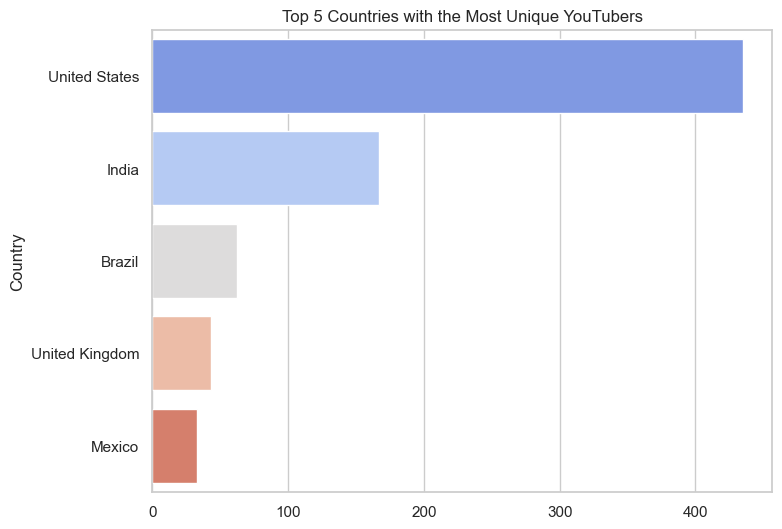

In [327]:
# Plot the top 5 countries with the highest number of YouTubers
plt.figure(figsize=(8,6))
sns.barplot(x=top_5.values, y=top_5.index, hue=top_5.index, palette  = 'coolwarm', legend = False)
plt.title('Top 5 Countries with the Most Unique YouTubers')
plt.xlabel = ('Number of youtubers')
plt.ylabel = ('Country')
plt.show()

#### Answer: The top 5 countries with highest number of youtube channels is USA - 435 youtube channels followed by India with 167 channels, Brazil with 62 channels, United Kingdom with 43 channels and lastly, Mexico with 33 channels.

## 5. What is the distribution of channel types across different categories?

TypeError: 'str' object is not callable

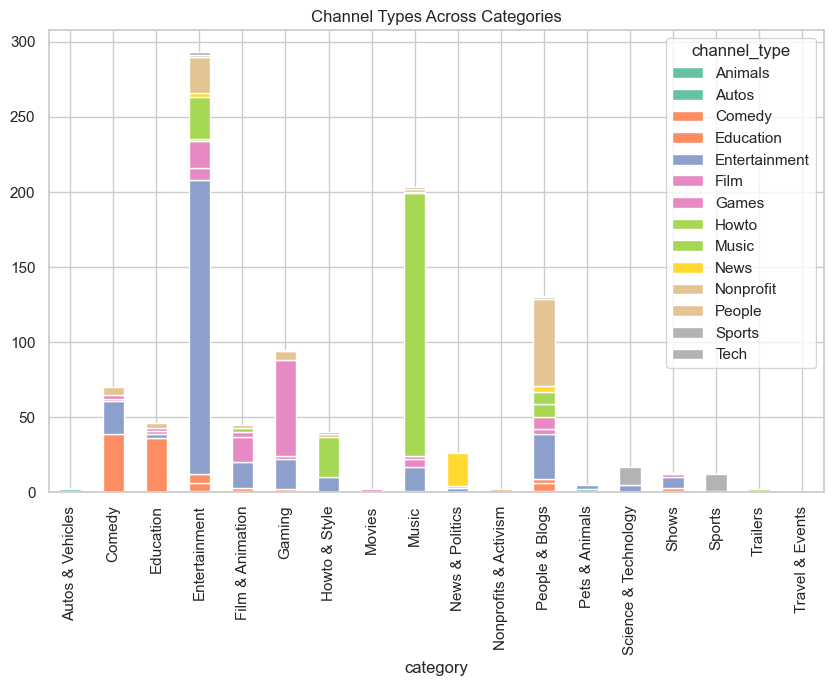

In [330]:
# Grouping data by 'category' and 'channel_type', then counting the occurrences
category_channel_count = data.groupby(['category', 'channel_type']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
category_channel_count.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Adding title and labels
plt.title('Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Channels')

# Display the plot
plt.show()


#### Key Inferences : 1. Entertainment category leads the distribution within which Entertainment channels are being most watched. 
#### 2. The next bar is heavily dominated by Music, indicating that this type of content is particularly popular in the entertainment sector.
#### 3. Categories such as Autos & Vehicles, Tech, and Science & Technology have relatively fewer total channels compared to categories like Entertainment and Music, but still show some distribution of different channel types.

## 6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot to show the relationship between subscribers and video views
sns.scatterplot(data=data, x='subscribers', y='video views', color='red', alpha=0.7)

plt.title('Relationship Between Subscribers and Total Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Total Video Views')
plt.show()

In [ ]:
# #Correlation
# correlation = data['subscribers'].corr(data['video views'])
# print('Correlation between subscribers and video views: {correlation}')
# sns.scatterplot(x='subscribers', y='video views', data=data)
# plt.title('Subscribers vs. Video Views')
# plt.show()

#### ANswer: - From the scatterplot depicting the relationship between subscribers and total video views, there is a positive correlation which means There is a visible positive trend in the data: channels with a higher number of subscribers tend to have higher video views.
#### - A significant number of channels are clustered at the lower end of both axes which means most channels have a relatively low subscriber count and correspondingly lower video views.
#### - A few outliers are visible where channels with exceptionally high subscriber counts.

## 7.	How do the monthly earnings vary throughout different categories?

In [ ]:
plt.figure(figsize=(24,10))
sns.boxplot(x='category', y = 'highest_monthly_earnings', data=data)
plt.xlabel('Category')
plt.ylabel('Monthly Earnings')
plt.xticks(rotation=45)

plt.show()

TypeError: 'str' object is not callable

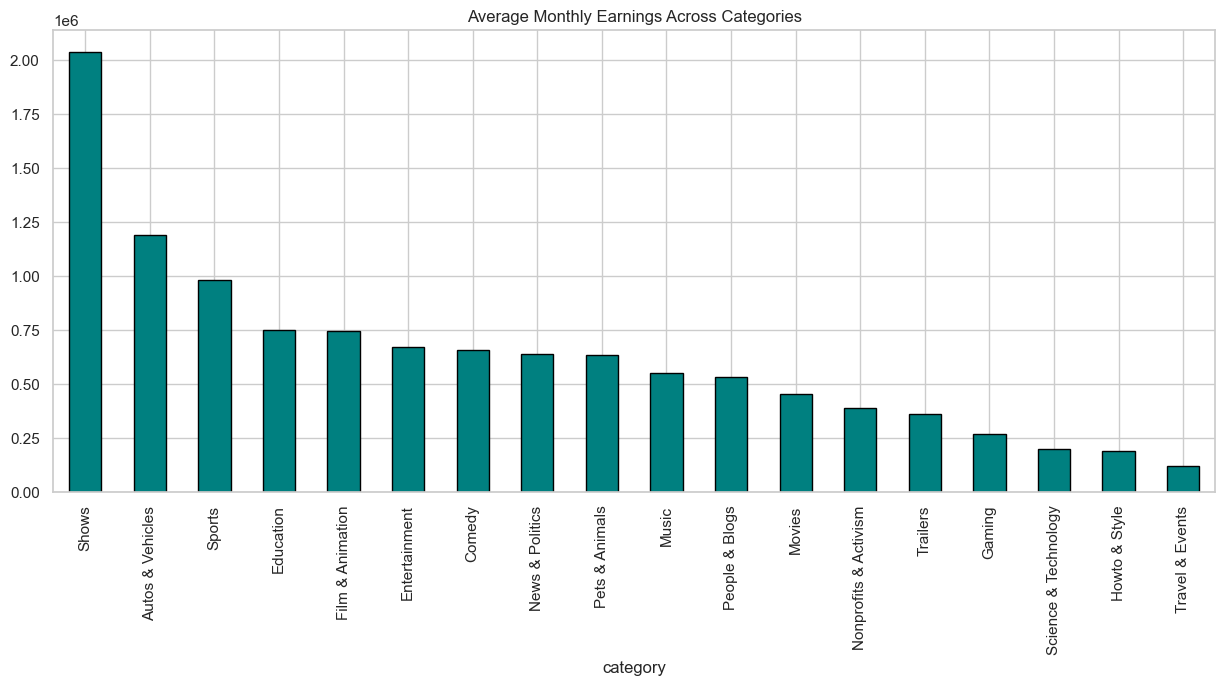

In [335]:
# Aggregating data by category
category_earnings = data.groupby('category')['highest_monthly_earnings'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
category_earnings.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Monthly Earnings Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Monthly Earnings')

plt.show()


C:\Users\Bhavika\AppData\Local\Temp\ipykernel_9996\3542322393.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='highest_monthly_earnings', y='category', palette='rocket', edgecolor='black')


TypeError: 'str' object is not callable

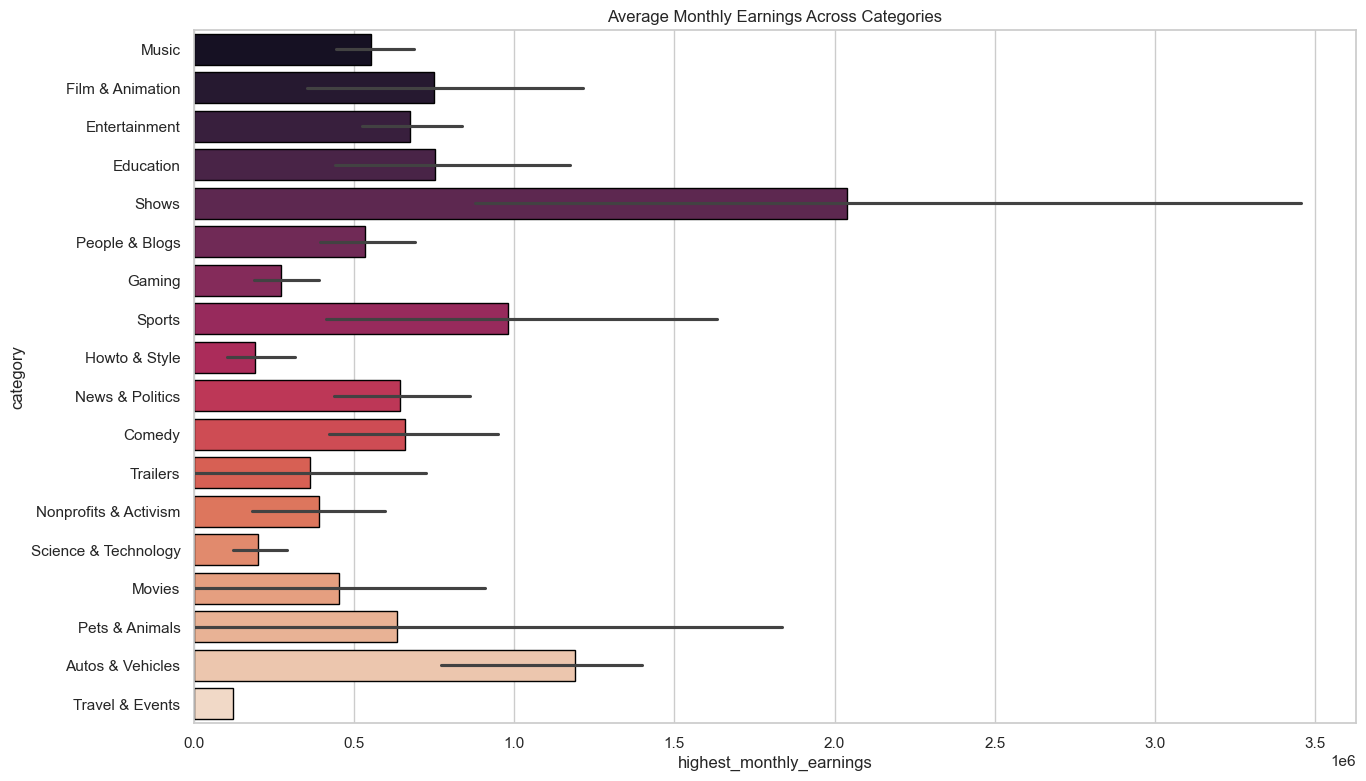

In [337]:
# Aggregating data by category

plt.figure(figsize=(15, 9))
sns.barplot(data=data, x='highest_monthly_earnings', y='category', palette='rocket', edgecolor='black')
plt.title('Average Monthly Earnings Across Categories')
plt.xlabel('Average Monthly Earnings')
plt.ylabel('Category')

plt.show()


#### - Shows" is the standout category with the highest potential monthly earnings, extending well beyond 3.5 million. 
#### - "Sports" and "Autos & Vehicles" also show high upper ranges, indicating strong earning potential, though not as extreme as "Shows.
#### - Categories like "Film & Animation," "Education," "News & Politics," and "Comedy" show moderate upper ranges.
#### - Categories like "Gaming," "Science & Technology," and "How-to & Style" have lower average earnings and a limited upper range.

## 8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(data['subscribers_for_last_30_days'], bins=30, kde=True)
plt.title('Distribution of Subscribers Gained in Last 30 Days')
plt.show()


## 9.	Are there any outliers in terms of yearly earnings from YouTube channels?

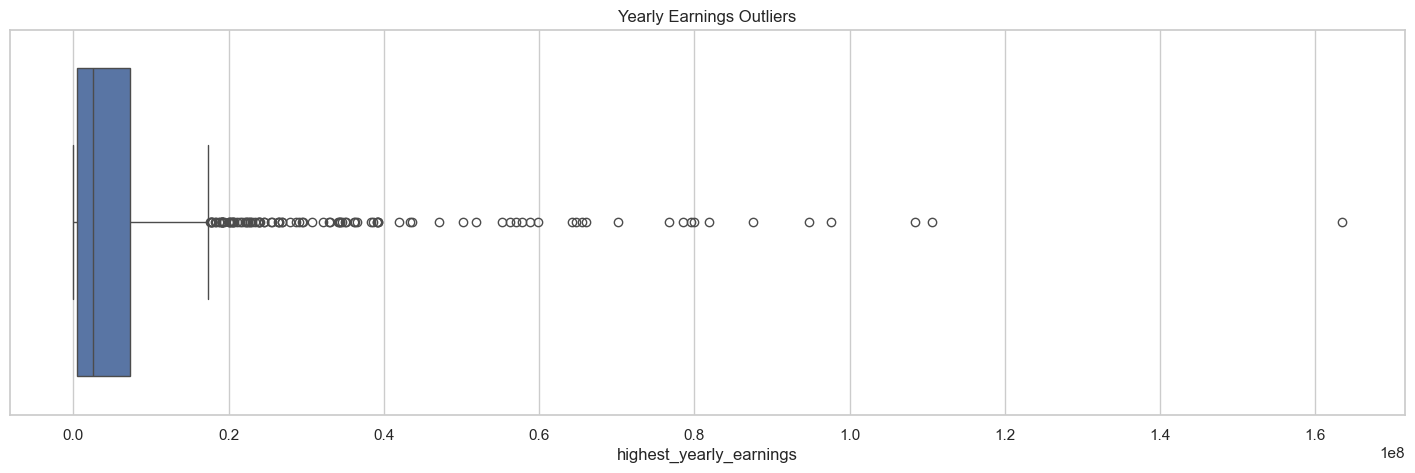

In [340]:
plt.figure(figsize=(18,5))
sns.boxplot(x=data['highest_yearly_earnings'])
plt.title('Yearly Earnings Outliers')
plt.show()


## 10.	What is the distribution of channel creation dates? Is there any trend over time?

In [417]:
data['created_date'] = pd.to_datetime(data['created_date'], errors='coerce')

In [469]:
# Map month names to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['created_month'] = data['created_month'].map(month_mapping)

data = data.dropna(subset=['created_year', 'created_month', 'created_date'])

data['created_year'] = data['created_year'].astype(int)
data['created_month'] = data['created_month'].astype(int)
data['created_date'] = data['created_date'].astype(int)

data['created_full_date'] = pd.to_datetime(
    data[['created_year', 'created_month', 'created_date']],
    errors='coerce')

data = data.dropna(subset=['created_full_date'])

print(data[['created_year', 'created_month', 'created_date', 'created_full_date']].head())


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

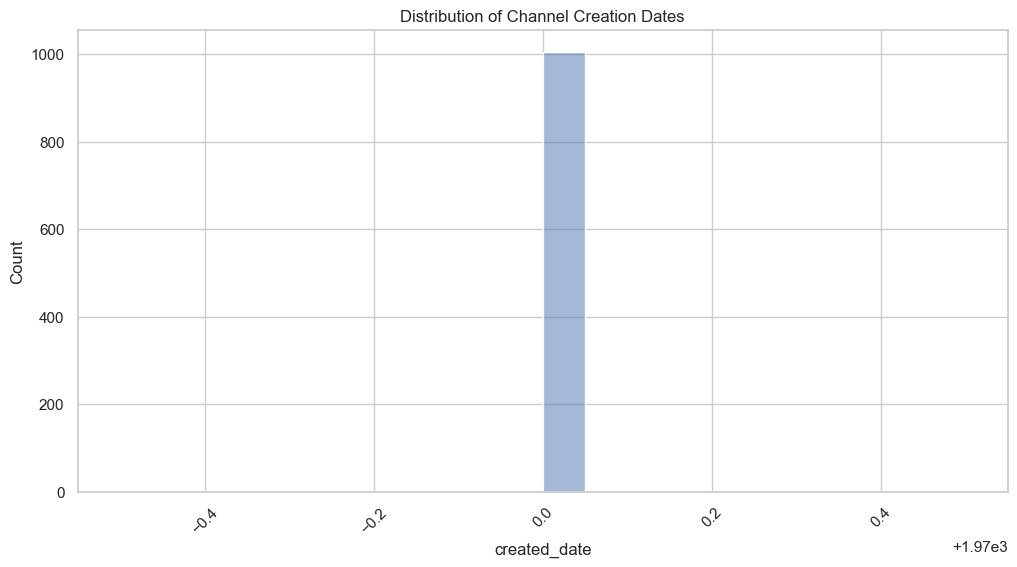

In [427]:
plt.figure(figsize=(12, 6))
sns.histplot(data['created_date'].dt.year, bins=20, kde=True)
plt.title('Distribution of Channel Creation Dates')

plt.show()


#### - The majority of channels (the bulk of the distribution) were created within a relatively short period, concentrated between around -0.2 to 0.2 on the x-axis.
#### - 


## 11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

TypeError: 'str' object is not callable

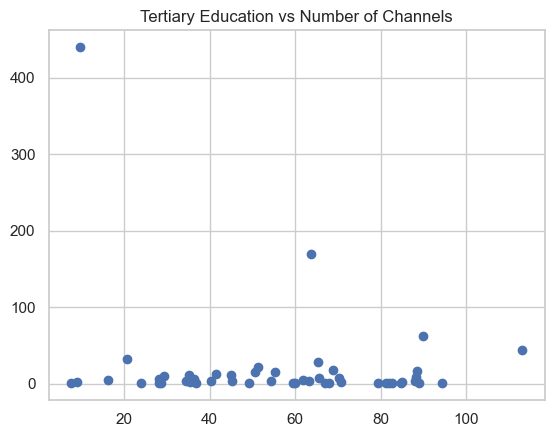

In [348]:
channels_per_country = data['Country'].value_counts()
education_vs_channels = data.groupby('Country')['Gross tertiary education enrollment (%)'].mean()

plt.scatter(education_vs_channels, channels_per_country)
plt.title('Tertiary Education vs Number of Channels')
plt.xlabel('Gross tertiary education enrollment (%)')
plt.ylabel('Number of Channels')
plt.show()


## 12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

In [351]:
top_10_countries = data.groupby('Country')['Youtuber'].nunique().sort_values(ascending = False)
print(top_10_countries.head(10))

Country
United States     435
India             167
Brazil             62
United Kingdom     43
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             16
Name: Youtuber, dtype: int64


## 13.	What is the average urban population percentage in countries with YouTube channels?

In [354]:
# Summing the 'Urban_population' and 'Population' columns for the entire dataset
total_urban_population = data['Urban_population'].sum()
total_population = data['Population'].sum()

urban_pop_percentage = (total_urban_population / total_population) * 100

print(f'Average Urban Population Percentage: {urban_pop_percentage:.2f}%')


Average Urban Population Percentage: 52.03%


## 14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

TypeError: 'str' object is not callable

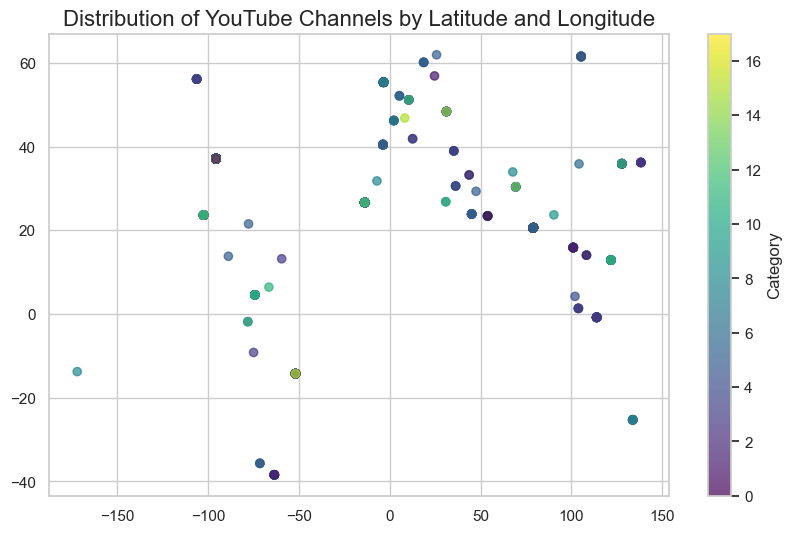

In [358]:
# Set the plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Longitude'], data['Latitude'], c=data['category'].astype('category').cat.codes, cmap='viridis', alpha=0.7)

plt.colorbar(scatter, label='Category')

plt.title('Distribution of YouTube Channels by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()


#### - There is higher concentrations of YouTube channels in North America, Europe, and parts of Asia. 
#### - Some regions, such as Africa, South America, and parts of Asia, appear to have relatively fewer YouTube channel locations.
#### - The color gradient along the right side of the graph represents a "Category" value.
#### -  In Western Europe, with a high density of channels in countries like the UK, France, Germany, and Spain.

## 15.	What is the correlation between the number of subscribers and the population of a country?

TypeError: 'str' object is not callable

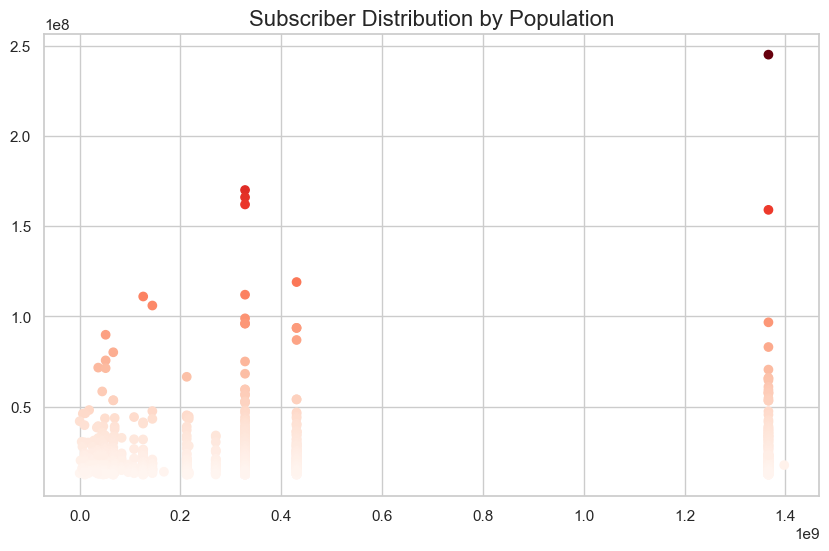

In [360]:
plt.figure(figsize=(10, 6))

plt.scatter(data['Population'], data['subscribers'], c=data['subscribers'], cmap='Reds')
plt.title('Subscriber Distribution by Population', fontsize=16)
plt.xlabel('Total Population', fontsize=12)
plt.ylabel('Total Subscribers', fontsize=12)

plt.colorbar(label='Subscribers')  # Color bar to show intensity of subscriber count
plt.show()


In [408]:
correlation = data['subscribers'].corr(data['Population'])
print(f'Correlation between subscribers and population: {correlation}')


Correlation between subscribers and population: 0.07804283591015011


#### - As the population size increases, the number of subscribers also tends to increase, though the relationship is not perfectly linear.
#### - Some countries/regions have relatively high subscriber numbers compared to their population, while others have lower subscriber numbers relative to their population.
#### - The correlation coefficient 0.07804283591015011, which indicates a very weak positive correlation between subscribers and population. This means the two variables are not strongly linearly related.

## 16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

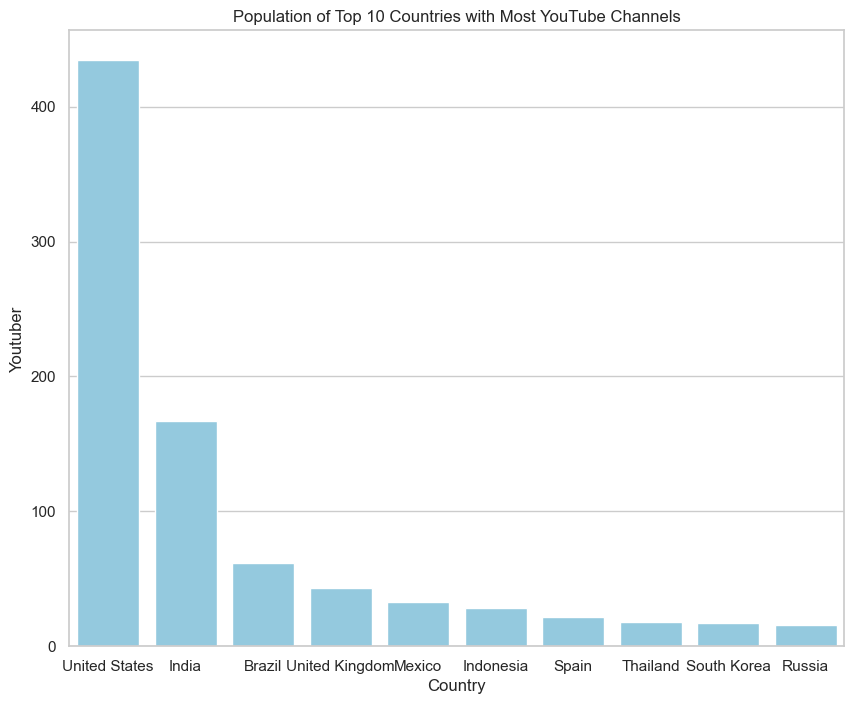

In [365]:
top_10 = data.groupby('Country').agg({'Youtuber': 'nunique', 'Population': 'first'}).sort_values('Youtuber', ascending=False)
top_10_countries = top_10.head(10)
top_10_countries_population = data[data['Country'].isin(top_10_countries)].groupby('Country')['Population'].mean()

plt.figure(figsize=(10,8))
sns.barplot(x='Country', y='Youtuber', data=top_10_countries, color='skyblue')
plt.title('Population of Top 10 Countries with Most YouTube Channels')
plt.show()


## 17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

Correlation between Subscribers gained in the last 30 days and Unemployment Rate: {correlation}


TypeError: 'str' object is not callable

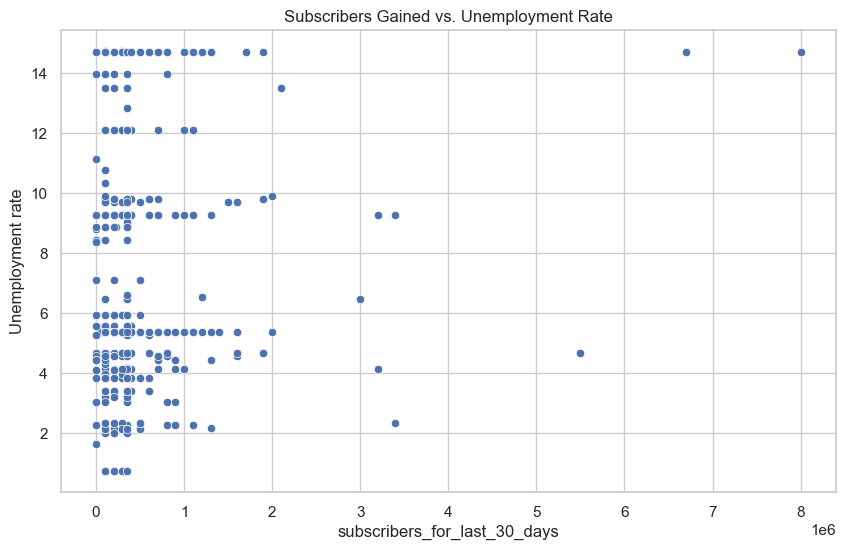

In [405]:
correlation = data[['subscribers_for_last_30_days', 'Unemployment rate']].corr()
print('Correlation between Subscribers gained in the last 30 days and Unemployment Rate: {correlation}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers_for_last_30_days', y='Unemployment rate', data=data)
plt.title('Subscribers Gained vs. Unemployment Rate')
plt.xlabel('Subscribers Gained (Last 30 Days)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

#### - A large concentration of data points appears around lower subscriber gains (near 0 to 2 million) and lower unemployment rates (0% to 4%).
#### - The plot does not indicate a strong linear or non-linear correlation. The distribution appears random, with no obvious relationship between the two variables.
#### - There seems to be little to no correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country.

## 18.	How does the distribution of video views for the last 30 days vary across different channel types?

C:\Users\Bhavika\AppData\Local\Temp\ipykernel_9996\776603431.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['video_views_for_the_last_30_days'], data['channel_type'], cmap='Reds')


TypeError: 'str' object is not callable

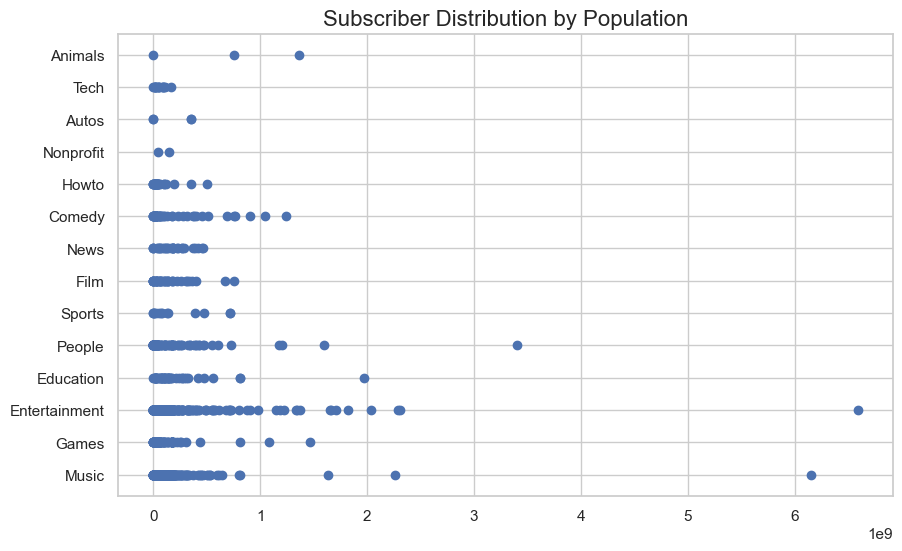

In [373]:
plt.figure(figsize=(10, 6))

plt.scatter(data['video_views_for_the_last_30_days'], data['channel_type'], cmap='Reds')
plt.title('Subscriber Distribution by Population', fontsize=16)
plt.xlabel('video_views_for_the_last_30_days', fontsize=12)
plt.ylabel('channel_type', fontsize=12)

plt.colorbar(label='Subscribers')  # Color bar to show intensity of subscriber count
plt.show()


#### - Music and Entertainment channels have the largest distribution of subscribers. Some of these points extend beyond 6 billion subscribers.
#### - Games also show substantial subscriber counts, though not as high as Music and Entertainment.
#### - Categories like Education, People, and Tech have subscriber distributions mostly concentrated below 1 billion, but there are still outliers reaching into the multi-billion range.
#### - here are a few scattered outliers across categories, particularly in Music, Entertainment, and People, indicating channels with exceptional subscriber counts.

## 19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?

C:\Users\Bhavika\AppData\Local\Temp\ipykernel_9996\3949636351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='coolwarm')


TypeError: 'str' object is not callable

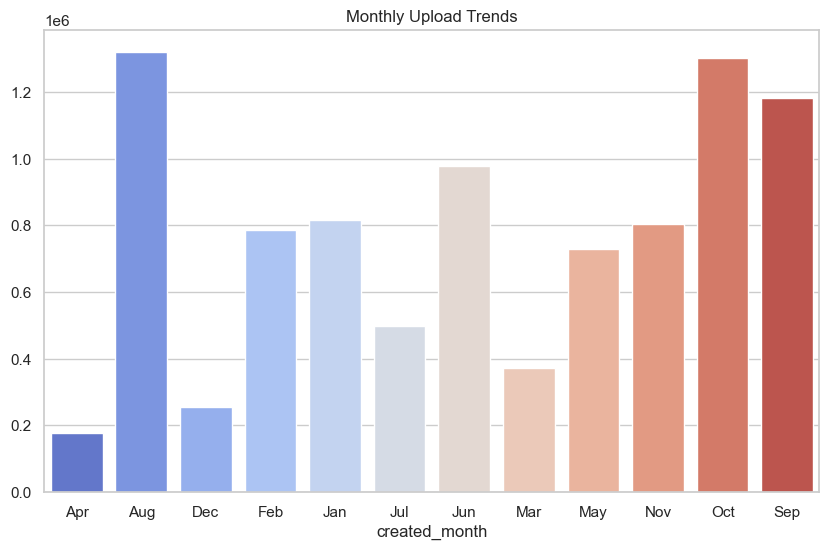

In [377]:
# Group by month and count the total uploads
monthly_trend = data.groupby('created_month')['uploads'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='coolwarm')
plt.title('Monthly Upload Trends')
plt.xlabel('Month')
plt.ylabel('Total Uploads')
plt.show()


#### - August shows the highest number of uploads, followed closely by September and October.
#### - April and March have the lowest upload counts, with April showing a significant drop compared to other months.
#### - Other months (like January, June, and November) display moderately high activity, indicating a consistent baseline of uploads throughout the year.


TypeError: 'str' object is not callable

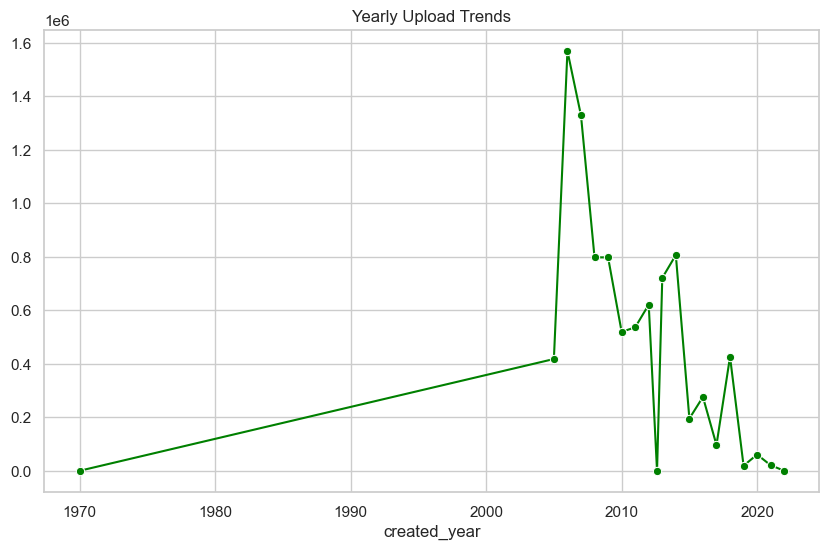

In [380]:
# Group by year and count total uploads
yearly_trend = data.groupby('created_year')['uploads'].sum()

# Plot the yearly trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='green')
plt.title('Yearly Upload Trends')
plt.xlabel('Year')
plt.ylabel('Total Uploads')
plt.show()


#### - A sharp rise is visible around 2005-2010, indicating a massive growth in uploads during this period.
#### - The fluctuation and declining trend post-2010 could indicate market saturation, with fewer new users contributing uploads.

## 20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [398]:
data2 = pd.read_csv(r"C:\Users\Bhavika\Downloads\DsResearch\DsResearch\Media and Technology\Media and Technology\Global YouTube Statistics.csv", encoding='ISO-8859-1')

data2['created_year'] = pd.to_numeric(data2['created_year'], errors='coerce')
data2['created_month'] = pd.to_numeric(data2['created_month'], errors='coerce')
data2['Months_Active'] = (2024 - data2['created_year']) * 12 + (9 - data2['created_month'])

data['Subscribers_Per_Month'] = data2['subscribers'] / data2['Months_Active']
data2 = data2.dropna(subset=['Months_Active', 'subscribers'])
data2 = data2[data2['Months_Active'] > 0]
data2['Subscribers_Per_Month'] = data2['subscribers'] / data2['Months_Active']
top_10_channels = data2.nlargest(10, 'Subscribers_Per_Month')
print(top_10_channels[['rank', 'Youtuber', 'Subscribers_Per_Month']].head())


top_10_channels = data.nlargest(10, 'Subscribers_Per_Month')
print(top_10_channels.head(5))

Empty DataFrame
Columns: [rank, Youtuber, Subscribers_Per_Month]
Index: []
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... created_year  created_mo